In [1]:
using JuMP;
using HiGHS;

In [222]:
pwd()

"C:\\Users\\Chester"

# Exo 2

In [146]:
demand_dist = [3 0.4 ; 5 0.6] # Input de l'utilisateur, chaque ligne est demand + proba, demand_dist doit être une matrice

function camionStoch(demand_dist)
    m = Model(HiGHS.Optimizer)
    cost = 100
    cost_after = 150

    (nb_scenarios, _) = size(demand_dist)
    demands = demand_dist[1:nb_scenarios,1]
    prob = demand_dist[1:nb_scenarios,2]
    
    @variable(m,x>=0)
    @variable(m,y[1:nb_scenarios]>=0)
    @variable(m,z[1:nb_scenarios]>=0)
    for i = 1:nb_scenarios
        # techniquement il faut mettre l'égalité ici mais c'est un problème min et il n'y a aucune raison de commander plus que la demande alors c mieux
        @constraint(m,sum([x,y[i],-z[i]])>=demands[i]) 
    end
    @objective(m,Min, cost*x + cost_after*(sum(prob[i]*y[i] for i=1:nb_scenarios)))

    status = optimize!(m)

    return m, status
end
    
m,status = camionStoch(demand_dist)

Running HiGHS 1.11.0 (git hash: 364c83a51e): Copyright (c) 2025 HiGHS under MIT licence terms
LP   has 2 rows; 5 cols; 6 nonzeros
Coefficient ranges:
  Matrix [1e+00, 1e+00]
  Cost   [6e+01, 1e+02]
  Bound  [0e+00, 0e+00]
  RHS    [3e+00, 5e+00]
Presolving model
2 rows, 3 cols, 4 nonzeros  0s
2 rows, 3 cols, 4 nonzeros  0s
Presolve : Reductions: rows 2(-0); columns 3(-2); elements 4(-2)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Pr: 2(8) 0s
          2     4.8000000000e+02 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model status        : Optimal
Simplex   iterations: 2
Objective value     :  4.8000000000e+02
P-D objective error :  0.0000000000e+00
HiGHS run time      :          0.00


(A JuMP Model
├ solver: HiGHS
├ objective_sense: MIN_SENSE
│ └ objective_function_type: AffExpr
├ num_variables: 5
├ num_constraints: 7
│ ├ AffExpr in MOI.GreaterThan{Float64}: 2
│ └ VariableRef in MOI.GreaterThan{Float64}: 5
└ Names registered in the model
  └ :x, :y, :z, nothing)

In [148]:
print(m)

In [152]:
println(value.(m[:x]))
println(value.(m[:y]))
println(value.(m[:z]))
println(objective_value(m))

3.0
[0.0, 2.0]
[0.0, 0.0]
480.0


Tester un autre distribution

In [209]:
demand_dist_2 = [5 0.4; 8 0.5; 10 0.1]
m2, status2 = camionStoch(demand_dist_2)

Running HiGHS 1.11.0 (git hash: 364c83a51e): Copyright (c) 2025 HiGHS under MIT licence terms
LP   has 3 rows; 7 cols; 9 nonzeros
Coefficient ranges:
  Matrix [1e+00, 1e+00]
  Cost   [2e+01, 1e+02]
  Bound  [0e+00, 0e+00]
  RHS    [5e+00, 1e+01]
Presolving model
3 rows, 4 cols, 6 nonzeros  0s
3 rows, 4 cols, 6 nonzeros  0s
Presolve : Reductions: rows 3(-0); columns 4(-3); elements 6(-3)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Pr: 3(23) 0s
          3     8.0000000000e+02 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model status        : Optimal
Simplex   iterations: 3
Objective value     :  8.0000000000e+02
P-D objective error :  0.0000000000e+00
HiGHS run time      :          0.00


(A JuMP Model
├ solver: HiGHS
├ objective_sense: MIN_SENSE
│ └ objective_function_type: AffExpr
├ num_variables: 7
├ num_constraints: 10
│ ├ AffExpr in MOI.GreaterThan{Float64}: 3
│ └ VariableRef in MOI.GreaterThan{Float64}: 7
└ Names registered in the model
  └ :x, :y, :z, nothing)

In [211]:
print(m2)

In [213]:
println(value.(m2[:x]))
println(value.(m2[:y]))
println(value.(m2[:z]))
println(objective_value(m2))

5.0
[0.0, 3.0, 5.0]
[0.0, 0.0, 0.0]
800.0


# Exo 3

In [203]:
demand_dist = [40 0.4 ; 60 0.3 ; 80 0.3]

function electriciteStoch(demand_dist)
    m = Model(HiGHS.Optimizer)
    cost = 20
    cost_after = 50
    penalite = 100

    (nb_scenarios, _) = size(demand_dist)
    demands = demand_dist[1:nb_scenarios,1]
    prob = demand_dist[1:nb_scenarios,2]
    
    @variable(m,0<=x<=100)
    @variable(m,y[1:nb_scenarios]>=0)
    @variable(m,z[1:nb_scenarios]>=0)
    for i = 1:nb_scenarios
        @constraint(m,sum([x,y[i],z[i]])>=demands[i]) 
    end
    
    @objective(m,Min, cost*x + cost_after*(sum(prob[i]*y[i] for i=1:nb_scenarios)) + penalite*(sum(prob[i]*z[i] for i=1:nb_scenarios)))

    status = optimize!(m)

    return m, status
end
    
m,status = electriciteStoch(demand_dist)

Running HiGHS 1.11.0 (git hash: 364c83a51e): Copyright (c) 2025 HiGHS under MIT licence terms
LP   has 3 rows; 7 cols; 9 nonzeros
Coefficient ranges:
  Matrix [1e+00, 1e+00]
  Cost   [2e+01, 4e+01]
  Bound  [1e+02, 1e+02]
  RHS    [4e+01, 8e+01]
Presolving model
3 rows, 4 cols, 6 nonzeros  0s
3 rows, 4 cols, 6 nonzeros  0s
Presolve : Reductions: rows 3(-0); columns 4(-3); elements 6(-3)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Pr: 3(180) 0s
          2     1.5000000000e+03 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model status        : Optimal
Simplex   iterations: 2
Objective value     :  1.5000000000e+03
P-D objective error :  0.0000000000e+00
HiGHS run time      :          0.00


(A JuMP Model
├ solver: HiGHS
├ objective_sense: MIN_SENSE
│ └ objective_function_type: AffExpr
├ num_variables: 7
├ num_constraints: 11
│ ├ AffExpr in MOI.GreaterThan{Float64}: 3
│ ├ VariableRef in MOI.GreaterThan{Float64}: 7
│ └ VariableRef in MOI.LessThan{Float64}: 1
└ Names registered in the model
  └ :x, :y, :z, nothing)

In [205]:
print(m)

In [207]:
println(value.(m[:x]))
println(value.(m[:y]))
println(value.(m[:z]))
println(objective_value(m))

60.0
[0.0, 0.0, 20.0]
[0.0, 0.0, 0.0]
1500.0


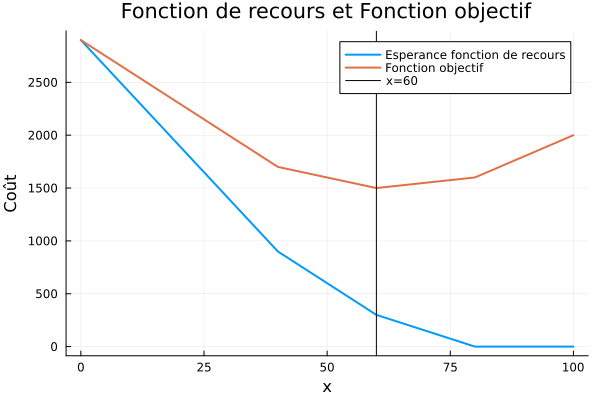

In [217]:
using Plots;
function Q(x,D)
    return max(0,50*(D-x));
end

function EQ(x)
    return max(0,50*0.4*(40-x)) + max(0,50*0.3*(60-x)) + max(0,50*0.3*(80-x))
end

function objectif(x)
    return 20*x + EQ(x)
end

x = 0:1:100
#Q1_y = [Q(xi,40) for xi in x]
#Q2_y = [Q(xi,60) for xi in x]
#Q3_y = [Q(xi,80) for xi in x]
EQ_y = [EQ(xi) for xi in x]
objectif_y = [objectif(xi) for xi in x]

plot(x, EQ_y, label="Esperance fonction de recours", lw=2)
plot!(x, objectif_y, label="Fonction objectif", lw=2)
vline!([60],label="x=60",color="black")

xlabel!("x")
ylabel!("Coût")
title!("Fonction de recours et Fonction objectif")
plot!(grid=true)

#savefig("plot.png")

